In [1]:
%matplotlib notebook
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
# loading the dataset
digits = load_digits()

x_data = digits.data
y_data = digits.target

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, random_state = 1234)

# No using PCA

In [3]:
mlp = MLPClassifier(hidden_layer_sizes=(100,50) ,max_iter=500)
mlp.fit(x_train,y_train )

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [4]:
predictions = mlp.predict(x_test)
print(classification_report(predictions, y_test))
print(confusion_matrix(predictions, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      0.94      0.97        50
           2       1.00      1.00      1.00        49
           3       1.00      1.00      1.00        44
           4       0.94      0.96      0.95        51
           5       0.94      0.98      0.96        47
           6       0.98      0.96      0.97        46
           7       0.97      0.97      0.97        40
           8       0.95      0.93      0.94        44
           9       0.93      0.98      0.95        42

   micro avg       0.97      0.97      0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 47  0  0  1  0  0  0  2  0]
 [ 0  0 49  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  0  0]
 [ 0  0  0  0 49  1  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  1]
 [ 0  0  0  0  1  1 44  0  0  0]
 [ 0  0  0

# Using PCA

In [5]:
pca = PCA()
pca.fit(x_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

<IPython.core.display.Javascript object>


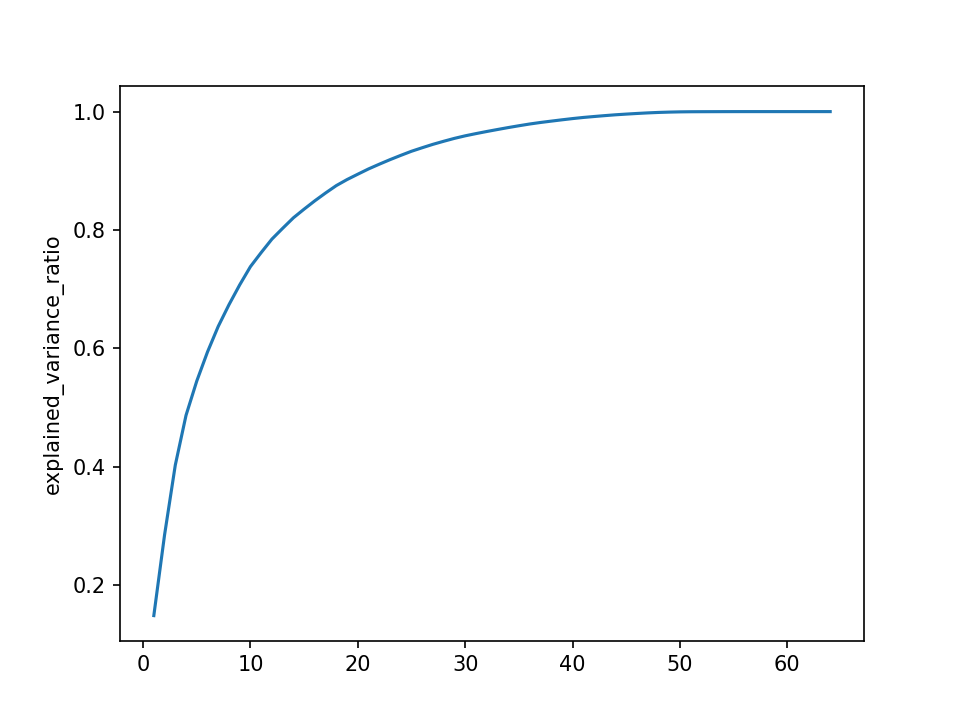

Text(0, 0.5, 'explained_variance_ratio')

In [6]:
sum_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(sum_variance) + 1), sum_variance)
plt.ylabel('explained_variance_ratio')

In [7]:
pca_ = PCA(n_components=0.8, whiten=True)
pca_.fit(x_data)
x_train_pca = pca_.transform(x_train)

In [8]:
mlp_pca = MLPClassifier(hidden_layer_sizes=(100,50) ,max_iter=500)
mlp_pca.fit(x_train_pca,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [9]:
x_test_pca = pca_.transform(x_test)
predictions_pca = mlp_pca.predict(x_test_pca)
print(classification_report(predictions_pca, y_test))
print(confusion_matrix(predictions_pca, y_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       1.00      0.96      0.98        49
           2       1.00      0.92      0.96        53
           3       1.00      0.98      0.99        45
           4       0.98      1.00      0.99        51
           5       0.94      1.00      0.97        46
           6       0.98      0.98      0.98        45
           7       1.00      0.95      0.98        42
           8       0.88      0.95      0.92        40
           9       0.98      1.00      0.99        43

   micro avg       0.97      0.97      0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450

[[36  0  0  0  0  0  0  0  0  0]
 [ 0 47  0  0  0  0  0  0  2  0]
 [ 1  0 49  0  0  0  0  0  3  0]
 [ 0  0  0 44  0  1  0  0  0  0]
 [ 0  0  0  0 51  0  0  0  0  0]
 [ 0  0  0  0  0 46  0  0  0  0]
 [ 0  0  0  0  0  1 44  0  0  0]
 [ 0  0  0